In [3]:
from wikipedia2vec import Wikipedia2Vec

In [4]:
# load .txt data
# data = open('../datasets/enwiki_20180420_100d.txt', 'r')

# print('start reading.')

# content = data.read()

# print('read content')

# import pickle

# pickleFile = open('pickleWikipediaWords', 'ab')

# print('start dumping')

# pickle.dump(content, pickleFile)

# print('dumped to pickle file.')

# pickleFile.close()
# data.close()


In [5]:
wiki2vec = Wikipedia2Vec.load("../datasets/enwiki_20180420_100d.pkl")
print(wiki2vec.get_word_vector("account"))
wiki2vec.most_similar(wiki2vec.get_word('nail'),10)

/home/bob/anaconda3/envs/code/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12560804 -0.5235532  -0.13231167 ... -0.48633438  0.45111445
   0.11309847]
 [-0.12473089 -0.6455471   0.13622157 ... -0.6347396   0.5410465
   0.32159257]
 [-0.05129661 -0.4987064  -0.09563554 ... -0.30148467  0.24280211
  -0.08308805]
 ...
 [-1.0583687  -0.83086014 -0.4427682  ... -1.0160557  -0.02469787
   0.99688977]
 [-1.0772408  -0.32139003 -0.79673034 ... -1.3150353  -0.12155519
   0.57841384]
 [-0.86319923 -0.5425662  -0.5506818  ... -1.1069874   0.26995388
   0.43403685]] loaded from the file ../datasets/enwiki_20180420_100d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/home/bob/anaconda3/envs/code/l

[ 0.26157779 -0.06324237  0.01413879  0.3471325  -0.03113616  0.04367286
  0.16051093  0.13918966  0.4020053   0.02132417  0.4937738  -0.19357482
  0.16570787  0.20006967  0.46038646  0.11534599 -0.07132792  0.06508564
  0.33278874 -0.3134719   0.23085992 -0.34622437  0.03082101  0.506029
 -0.45648044 -0.16179349 -0.55180806 -0.48477042  0.39876133  0.35310695
 -0.02152728 -0.09419352  0.3356566   0.7128895  -0.16417094 -0.21861316
  0.23070154  0.420371    0.08505379  0.22867164 -0.10435292 -0.23085395
 -0.5007337   0.32013428  0.06766731  0.25432208 -0.19289295  0.32780027
 -0.27101117  0.29084572  0.12556057 -0.06193651  0.16854699  0.58460623
  0.11538803  0.0525699  -0.17319302  0.17267288  0.00414904  0.2039684
 -0.19071926 -0.251641    0.06552824  0.2605905   0.5945521  -0.6533295
 -0.32521802 -0.3095794  -0.30898058 -0.3941069   0.04687437  0.3577981
  0.12849359  0.3052618  -0.26543605  0.51226574 -0.12460668  0.2912351
 -0.06106061 -0.30229414 -0.4071444  -0.48364484  0.26128

[ItemWithScore(item=<Word nail>, score=1.0),
 ItemWithScore(item=<Word hurriquake>, score=0.7744725942611694),
 ItemWithScore(item=<Word nails>, score=0.7489219307899475),
 ItemWithScore(item=<Word fingernails>, score=0.7278966307640076),
 ItemWithScore(item=<Word toenail>, score=0.7257317900657654),
 ItemWithScore(item=<Word shoe>, score=0.714025616645813),
 ItemWithScore(item=<Word hoof>, score=0.7137674689292908),
 ItemWithScore(item=<Word glue>, score=0.7104105949401855),
 ItemWithScore(item=<Word fingernail>, score=0.7092493772506714),
 ItemWithScore(item=<Word splint>, score=0.7087520956993103)]

In [6]:
# define nouns 
nouns= [
    "man",
    'woman',
    'person',
    'dinner',
    'meal',
    'sauce',
    'chef',
    'program',
    "application",
    "software", 
    'programmer'
]

In [7]:
# from pprint import pprint
import numpy as np

vecs = []
for noun in nouns:
    if noun == "charge_n":
        vecs.append(wiki2vec.get_word_vector("charge").tolist())
    else:
        vecs.append(wiki2vec.get_word_vector(noun).tolist())
vecs = np.array(vecs)

In [8]:
print(np.shape(vecs))

(11, 100)


In [9]:
# do PCA 
from sklearn.decomposition import PCA

from sklearn.decomposition import FastICA

ica = FastICA(n_components=4)
vecs_newICA = ica.fit_transform(vecs)

ica.
# print(ica.explained_variance_ratio_)

pca = PCA(n_components=4)
vecs_new = pca.fit_transform(vecs)
print(pca.explained_variance_ratio_)

[0.32661987 0.21748696 0.13158379 0.09290774]


In [10]:
print(np.shape(vecs_newICA))

print(vecs_new)

(11, 4)
[[-0.08339323  1.65218213  0.58450165 -0.38779236]
 [-0.15982692  2.26382863  0.38672449 -0.3687895 ]
 [-0.7727558   1.48279067  0.28383688 -0.82686359]
 [ 1.50457626  0.20538495 -1.45335336  0.01691031]
 [ 1.89525015 -0.49836064 -1.32038626 -0.28401591]
 [ 2.81732837 -1.74726816  1.56765028 -0.82161932]
 [ 1.24134205  0.30595232  0.65827697  2.11186316]
 [-0.93049446 -0.18792703 -1.39842257  0.74587635]
 [-1.46772026 -1.07669544 -0.58867203 -0.69352314]
 [-2.22320013 -1.7363394   0.12235683 -0.19148203]
 [-1.82110604 -0.66354804  1.15748713  0.69943603]]


In [11]:
sum_of_rows = np.linalg.norm(vecs_new,axis=1)
normalized_array = vecs_new / sum_of_rows[:, np.newaxis]

sum_of_rowsICA = np.linalg.norm(vecs_newICA,axis=1)
normalizedArrayICA = vecs_newICA / sum_of_rowsICA[:, np.newaxis]

new_noun_vectors = {}

newNounVectorsICA = {}

for i, noun in enumerate(nouns):
   new_noun_vectors[noun] = normalized_array[i].tolist()
   newNounVectorsICA[noun] = normalizedArrayICA[i].tolist()

In [12]:
print(new_noun_vectors)

{'man': [-0.04641067895771134, 0.919485873505192, 0.32529162382451876, -0.2158173690245671], 'woman': [-0.06855026708725406, 0.970963212598849, 0.1658673507192049, -0.15817497471907765], 'person': [-0.4095547800692254, 0.7858679411358743, 0.1504314169872914, -0.4382315027476984], 'dinner': [0.7157790849154733, 0.09770874100670494, -0.6914105758445567, 0.00804482061645225], 'meal': [0.7963220893002455, -0.20939483198928172, -0.5547830975384536, -0.11933419088555805], 'sauce': [0.7496800847924793, -0.4649412402578309, 0.41714562135555733, -0.21862969642053917], 'chef': [0.48585536304548455, 0.1197482801042881, 0.25764646682613646, 0.8265731750692215], 'program': [-0.5036655288610961, -0.1017226527472682, -0.7569494243772382, 0.40373395434382103], 'application': [-0.7212593629102738, -0.5291040032507477, -0.2892821106702728, -0.3408074905345399], 'software': [-0.7855718102171602, -0.6135386856255279, 0.04323500836953707, -0.06766052234737642], 'programmer': [-0.77054148585914, -0.28075866

In [13]:
import json
fiel_new_vectors = "../datasets/newNounVectorsPCA.json"
with open(fiel_new_vectors, 'w') as fp:
    json.dump(new_noun_vectors, fp)

fiel_new_vectors = "../datasets/newNounVectorsICA.json"
with open(fiel_new_vectors, 'w') as fp:
    json.dump(newNounVectorsICA, fp)

In [14]:
'''
Now, we create further word dictionaries for the two cases of initializing all nouns to the same state and 

initializing food related words to 00 and it related words to 11 

'''

extremeDict = {}

for i in range(len(nouns)): 
    if i < 3: 
        extremeDict[nouns[i]] = [1/np.sqrt(2),0,0,1/np.sqrt(2)]
    elif i > 2 and i < 6: 
        extremeDict[nouns[i]] = [1, 0, 0, 0]
    else: 
        extremeDict[nouns[i]] = [0, 0, 0, 1]
    
print(extremeDict)


# same state 
baselineDict = {}
for noun in nouns: 
    baselineDict[noun] = [0,0,0,0]

print(baselineDict)



import json
fiel_new_vectors = "../datasets/trivialNounVectors.json"
with open(fiel_new_vectors, 'w') as fp:
    json.dump(baselineDict, fp)


fiel_new_vectors = "../datasets/ExtremeNounVectors.json"
with open(fiel_new_vectors, 'w') as fp:
    json.dump(extremeDict, fp)


{'man': [0.7071067811865475, 0, 0, 0.7071067811865475], 'woman': [0.7071067811865475, 0, 0, 0.7071067811865475], 'person': [0.7071067811865475, 0, 0, 0.7071067811865475], 'dinner': [1, 0, 0, 0], 'meal': [1, 0, 0, 0], 'sauce': [1, 0, 0, 0], 'chef': [0, 0, 0, 1], 'program': [0, 0, 0, 1], 'application': [0, 0, 0, 1], 'software': [0, 0, 0, 1], 'programmer': [0, 0, 0, 1]}
{'man': [0, 0, 0, 0], 'woman': [0, 0, 0, 0], 'person': [0, 0, 0, 0], 'dinner': [0, 0, 0, 0], 'meal': [0, 0, 0, 0], 'sauce': [0, 0, 0, 0], 'chef': [0, 0, 0, 0], 'program': [0, 0, 0, 0], 'application': [0, 0, 0, 0], 'software': [0, 0, 0, 0], 'programmer': [0, 0, 0, 0]}


(10,)


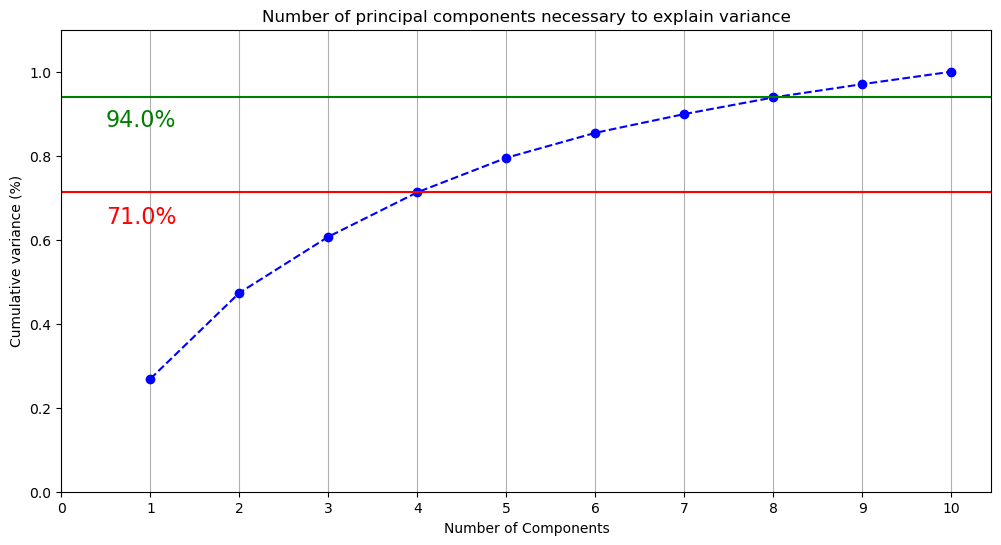

In [83]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vecs = scaler.fit_transform(vecs)

S_ica = ica.fit_transform(vecs)

# pca = PCA().fit(vecs)
pca = PCA(n_components=10)
vecs_new = pca.fit_transform(vecs)

# pca.explained_variance_ratio_

# % matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

print(np.shape(y))

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Number of principal components necessary to explain variance')

plt.axhline(y=y[3], color='r', linestyle='-')
plt.text(0.5, 0.64, str(np.round(y[3], 2)*100) + '%', color = 'red', fontsize=16)

plt.axhline(y=y[7], color='g', linestyle='-')
plt.text(0.5, 0.87, str(np.round(y[7], 2)*100) + '%', color = 'green', fontsize=16)


ax.grid(axis='x')
plt.show()

In [85]:
# Fit ICA
ica = FastICA(n_components=10)#, algorithm='parallel')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vecs = scaler.fit_transform(vecs)

S_ica = ica.fit_transform(vecs)  # Get the independent components

print(np.shape(vecs))

print((S_ica))

originalVar = np.var(vecs, axis = 0)


# Determine the number of components to use using the explained variance criterion
explained_variance = np.var(S_ica, axis=0)

print(explained_variance)

newVarSum = np.sum(explained_variance)
oldVarSum = np.sum(originalVar)

print('var old: ', np.sum(oldVarSum))
print('var new: ', np.sum(newVarSum))

explained_variance_ratio = explained_variance / np.sum(originalVar)

y = np.cumsum(explained_variance_ratio)

n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1

(11, 100)
[[ 0.23094112 -0.22778473 -0.23094112 -3.08568367  0.23094112 -0.23094112
  -0.23094112  0.23094112 -0.23094112 -0.23094112]
 [ 0.23094112 -0.22778473 -0.23094111  0.23094112  0.23094113 -0.23094112
  -0.23094112 -3.08568367 -0.23094112 -0.23094112]
 [ 0.23094112 -0.22778473 -0.23094112  0.23094112 -3.08568367 -0.23094112
  -0.23094112  0.23094111 -0.23094114 -0.23094113]
 [ 0.23094112 -0.22778473 -0.23094114  0.23094112  0.2309411  -0.23094112
  -0.23094112  0.23094112  3.08568367 -0.23094113]
 [ 0.23094112 -0.22778473 -0.23094113  0.23094113  0.23094111 -0.23094113
  -0.23094112  0.23094112 -0.23094112  3.08568367]
 [ 0.23094112 -0.22778473 -0.23094112  0.23094112  0.23094112 -0.23094111
   3.08568367  0.23094112 -0.23094112 -0.23094113]
 [ 0.23094113 -0.22778473  3.08568367  0.23094112  0.23094113 -0.23094113
  -0.23094112  0.23094113 -0.2309411  -0.23094112]
 [ 0.24133911  3.07827856 -0.24133911  0.24133911  0.24133911 -0.24133911
  -0.24133911  0.24133911 -0.24133911 -0.

(10,)


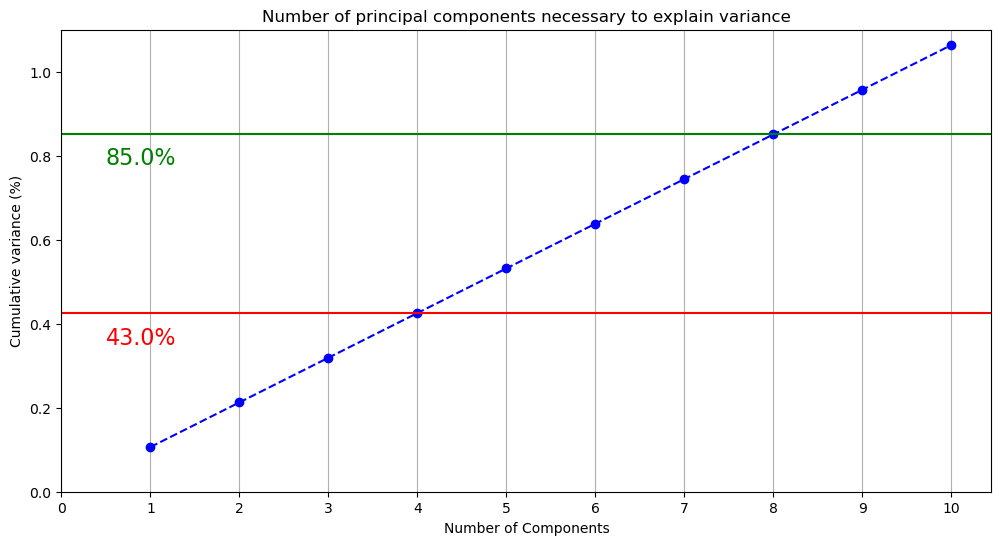

In [88]:
# same plot for ICA 

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
# y = np.cumsum(pca.explained_variance_ratio_)
# y = explained_variance_ratio

print(np.shape(y))

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Number of principal components necessary to explain variance')

plt.axhline(y=y[3], color='r', linestyle='-')
plt.text(0.5, 0.35, str(np.round(y[3], 2)*100) + '%', color = 'red', fontsize=16)

plt.axhline(y=y[7], color='g', linestyle='-')
plt.text(0.5, 0.78, str(np.round(y[7], 2)*100) + '%', color = 'green', fontsize=16)


ax.grid(axis='x')
plt.show()